In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
W, H = 900, 250

canvas = np.ones((H, W, 3), dtype=np.uint8) * 255

drawing = False
last_x, last_y = None, None

pen_thickness = 18
pen_color = (0, 0, 0)  

In [18]:
def mouse_draw(event, x, y, flags, param):
    global drawing, last_x, last_y, canvas

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_x, last_y = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(canvas, (last_x, last_y), (x, y), pen_color, pen_thickness, lineType=cv2.LINE_AA)
            last_x, last_y = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        last_x, last_y = None, None

In [19]:
cv2.namedWindow("LiveScribe Pad")
cv2.setMouseCallback("LiveScribe Pad", mouse_draw)

print("Controls: draw with mouse | c=clear | s=save | q=quit")

while True:
    cv2.imshow("LiveScribe Pad", canvas)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break
    elif key == ord("c"):
        canvas[:] = 255
    elif key == ord("s"):
        cv2.imwrite("draw.png", canvas)
        print("Saved draw.png")

cv2.destroyAllWindows()


Controls: draw with mouse | c=clear | s=save | q=quit
Saved draw.png


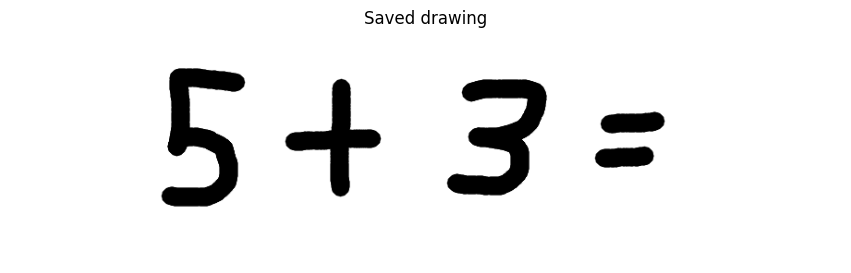

In [20]:
img = cv2.imread("draw.png")
if img is None:
    print("No draw.png found yet. Press 's' in the pad window to save.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 3))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Saved drawing")
    plt.show()


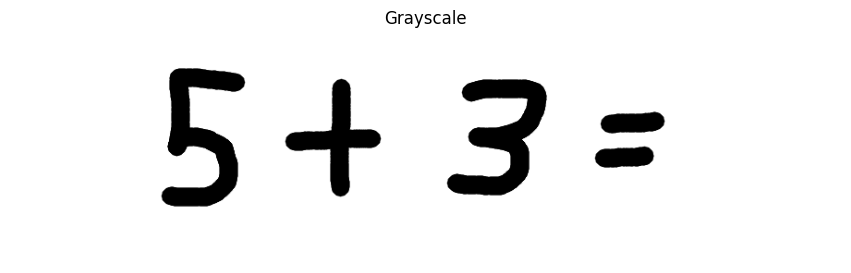

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 3))
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale")
plt.show()


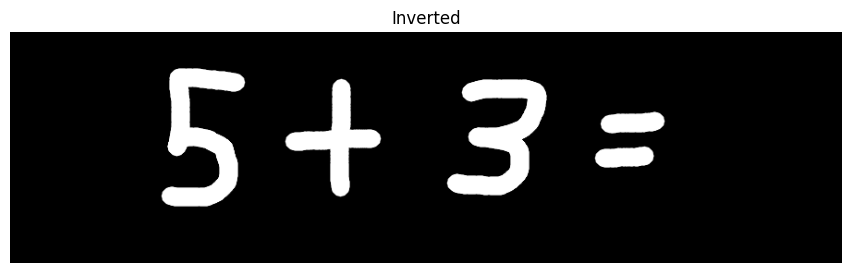

In [22]:
inv = 255 - gray

plt.figure(figsize=(12, 3))
plt.imshow(inv, cmap="gray")
plt.axis("off")
plt.title("Inverted")
plt.show()


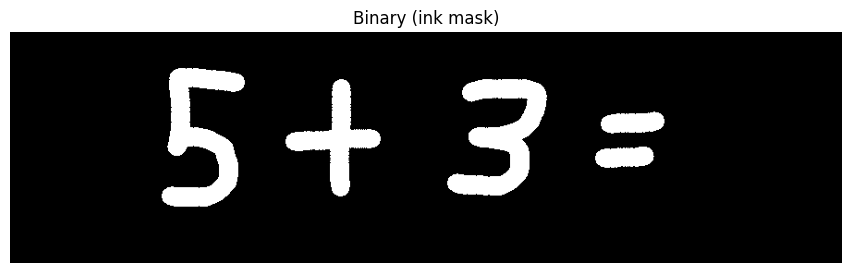

In [23]:
_, binary = cv2.threshold(
    inv, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.figure(figsize=(12, 3))
plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.title("Binary (ink mask)")
plt.show()


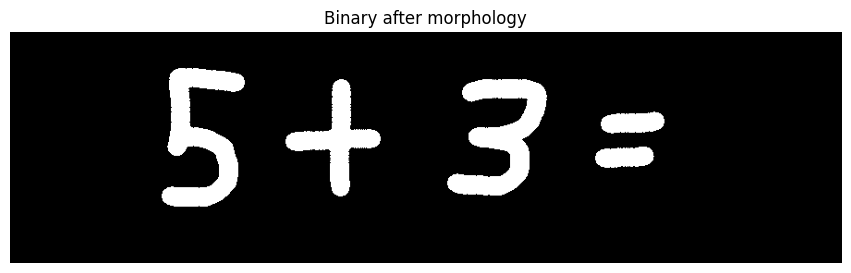

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
binary_clean = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 3))
plt.imshow(binary_clean, cmap="gray")
plt.axis("off")
plt.title("Binary after morphology")
plt.show()
